Phys427 a5 
Kai Jin

4-Vactor

In special relativity, a four-vector (also known as a 4-vector) is an object with four components, which transform in a specific way under Lorentz transformation. Specifically, a four-vector is an element of a four-dimensional vector space considered as a representation space of the standard representation of the Lorentz group, the (½,½) representation.

The basic idea behind Lorentz transformation was to get form invariance of spacetime laws of physics when transformed from one frame of reference to another moving with constant velocity v.

Invariant mass

The invariant mass, rest mass, intrinsic mass, proper mass, or in the case of bound systems simply mass, is the portion of the total mass of an object or system of objects that is independent of the overall motion of the system. More precisely, it is a characteristic of the system's total energy and momentum that is the same in all frames of reference related by Lorentz transformations.

In [1]:
import uproot
import uproot_methods as upm
import matplotlib.pyplot as plt
import awkward as awk
import math

In [2]:
#Open root file
#Real data
file = uproot.open("./4lep/Data/data_A.4lep.root")

In [3]:
#Determine name of root tree
file.keys()

[b'mini;1']

In [4]:
#Get root tree
tree = file.get('mini')

In [5]:
#Calculate square of magnitude of LorentzVector and square root it
def Mag(v):
    Mag2 = v.dot(v)
    if (Mag2<0.0):
        Mag = -(-Mag2)**0.5
    else:
        Mag = (Mag2)**0.5
    return Mag

In [6]:
#Calculate invariant mass free specific tree file
def cal_invmass(tree):
    #Initial variables and its values
    leadLepton = upm.TLorentzVector(0,0,0,0)
    trailLepton = upm.TLorentzVector(0,0,0,0)
    invmass = []
    
    lep_n = tree['lep_n'].array()
    lep_charge = tree['lep_charge'].array()
    lep_type = tree['lep_type'].array()
    lep_pt = tree.array('lep_pt')
    lep_eta = tree.array('lep_eta')
    lep_phi = tree.array('lep_phi')
    lep_E = tree.array('lep_E')
    
    for i in range(len(tree)):
        
        # Cut #1: At least 2 leptons
        if lep_n[i] >= 2:
            
            # Cut #2: Leptons with opposite charge
            if (lep_charge[i][0] != lep_charge[i][1]):
                
                # Cut #3: Leptons of the same family (2 electrons or 2 muons)
                if (lep_type[i][0] == lep_type[i][1]):
                    
                    # Define one TLorentz vector for each
                    leadLepton.x = lep_pt[i][0]/1000. * math.cos(lep_phi[i][0])
                    leadLepton.y = lep_pt[i][0]/1000. * math.sin(lep_phi[i][0])
                    leadLepton.z = lep_pt[i][0]/1000. * math.sinh(lep_eta[i][0])
                    leadLepton.t = lep_E[i][0]/1000.
                    
                    trailLepton.x = lep_pt[i][1]/1000. * math.cos(lep_phi[i][1])
                    trailLepton.y = lep_pt[i][1]/1000. * math.sin(lep_phi[i][1])
                    trailLepton.z = lep_pt[i][1]/1000. * math.sinh(lep_eta[i][1])
                    trailLepton.t = lep_E[i][1]/1000.
                    
                    # Addition of two TLorentz vectors above and calculate invariant mass
                    invmass.append(Mag(leadLepton + trailLepton))
                    
    return invmass

In [7]:
#Get invariant mass
invmass = cal_invmass(tree)

In [8]:
#Draw a histogram graph
def draw(data):
    plt.hist(data, 30, range=[40, 140], edgecolor='black')
    plt.xlabel('mass [GeV]')
    plt.ylabel('events')
    plt.xlim(40, 140)
    plt.title('Mass of the Z boson')

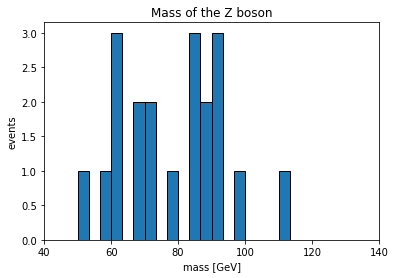

In [9]:
draw(invmass)

In [10]:
## 2lep 13 TeV sample
file = uproot.open("https://atlas-opendata.web.cern.ch/atlas-opendata/samples/2020/1largeRjet1lep/MC/mc_361106.Zee.1largeRjet1lep.root")
tree2 = file.get('mini')

In [11]:
invmass2 = cal_invmass(tree2)

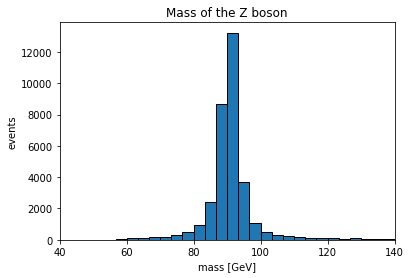

In [12]:
draw(invmass2)

In [13]:
## 4lepton 13 TeV sample
file = uproot.open("./mc_363490.llll.4lep.root")
tree3 = file.get('mini')

In [14]:
invmass3 = cal_invmass(tree3)

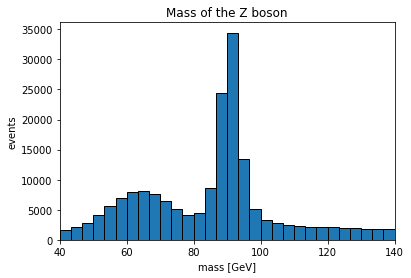

In [15]:
draw(invmass3)

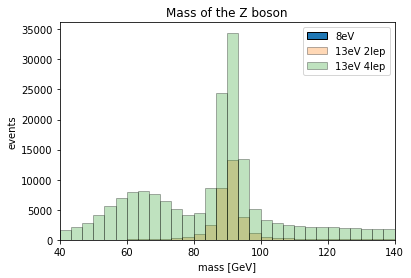

In [25]:
fig, ax = plt.subplots(1, 1)

ax.hist(invmass, 30, range=[40, 140], label='8eV', edgecolor='black', alpha=1.0)
ax.hist(invmass2, 30, range=[40, 140], label='13eV 2lep', edgecolor='black', alpha=0.3)
ax.hist(invmass3, 30, range=[40, 140], label='13eV 4lep', edgecolor='black', alpha=0.3)
ax.legend(loc='upper right')

plt.xlabel('mass [GeV]')
plt.ylabel('events')
plt.xlim(40, 140)
plt.title('Mass of the Z boson')

plt.show()

Baased on graphs, there are only a few mass can be found in real data, we can have a hypothesis that there is no mass for Z boson, there may be some other matter created causing the detection of mass.

Based on graphs of two simulated data, it's obviously another matter is created in 13eV 4lep simulation. There are two peaks. There are also more particles that have mass than 13eV 2lep.